# 🌐 IBM

We can now execute teleportation inside a chip of a real quantum computer thanks to IBM Quantum Experience. An account is neede d in order to perform it.

## 📚 Libraries

In [1]:
# Librerie necessarie
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex
from qiskit.tools.monitor import job_monitor
%matplotlib inline

## 🔧 Functions

In [2]:
# Funzioni per la creazione del circuito

def bell_pair(circuit, a, b):
    # Crea una coppia di Bell nel circuito usando i qubit 'a' e 'b'
    circuit.h(a)
    circuit.cx(a, b)
    
def Alice_side(circuit, c, a):
    # Operazioni che compie Alice, dove il qubit 'c' contiene lo stato da teletrasportare
    circuit.barrier()
    circuit.cx(c, a)
    circuit.h(c)
    
def Bob_side(circuit, c, a, b):
    circuit.barrier()
    # Modifica della funzione originaria poiché i quantum computer IBM non supportano istruzioni dopo misure
    circuit.cz(c, b)
    circuit.cx(a, b)

## ❓ Random State Initialization

In [3]:
# Creazione di uno stato iniziale casuale
# Si utilizza lo stesso metodo di QASM

psi = random_state(1)
init_gate = Initialize(psi) # Porta dallo stato |0> allo stato |psi>
init_gate.label = "init"
inverse_init_gate = init_gate.gates_to_uncompute() # Porta dallo stato |psi> allo stato |0>

## 🧩 Circuit Initialization

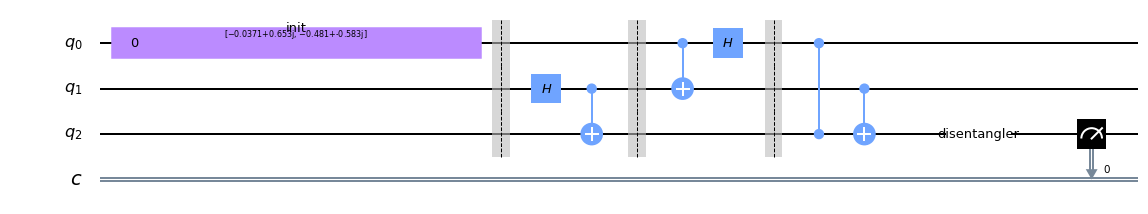

In [4]:
# Creazione del circuito

circuit = QuantumCircuit(3, 1) # 3 qubit e 1 bit

# Inizializzazione del qubit C da teletrasportare
circuit.append(init_gate, [0])
circuit.barrier()

# Passo 1: creazione della coppia di Bell
bell_pair(circuit, 1, 2)

# Passo 2: Alice agisce sui suoi qubit
Alice_side(circuit, 0, 1)

# Passo 3: Bob agisce sul suo qubit in base al risultato della misura di Alice
Bob_side(circuit, 0, 1 ,2)

# Passo 4: inversione del processo di inizializzazione e misura del valore
circuit.append(inverse_init_gate, [2])
circuit.measure(2,0)

circuit.draw(output = 'mpl')

## 🌐 Login

In [9]:
# Esecuzione in un quantum computer della IBM

IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
backend = provider.get_backend('ibmq_london')
job = execute(circuit, backend = backend, shots = 8192)
print(job.job_id())
job_monitor(job)

ibmqfactory.load_account:WARNING:2020-07-29 14:35:12,651: Credentials are already in use. The existing account in the session will be replaced.


5f216d077fa4e80019d6037b
Job Status: job has successfully run


## ✅ Verification

{'0': 7046, '1': 1146}


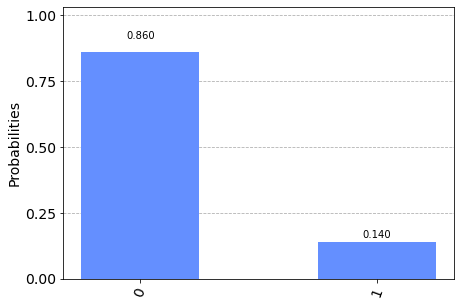

In [10]:
# Visualizzazione dei risultati

result = job.result()
measurement_result = result.get_counts(circuit)
print(measurement_result)
plot_histogram(measurement_result)

In [12]:
# Visualizzazione dell'errore percentuale

error_rate_percent = sum([measurement_result[result] for result in measurement_result.keys() if result[0]=='1']) \
                    * 100./ sum(list(measurement_result.values()))
print("L'errore sperimentale è del: ", error_rate_percent, "%")

L'errore sperimentale è del:  13.9892578125 %
